## Analysis of Selected Health Care Profession Salaries, over Time

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv(r'/Users/lukekulak/Documents/Analytics/Salary Analysis/salary data.csv')

In [4]:
df

,YEAR,OCC_TITLE,O_GROUP,TOT_EMP,H_MEAN,A_MEAN,MEAN_PRSE
0,2018,All Occupations,total,"144,733,270",24.98,"51,960",0.1
1,2018,Oral and Maxillofacial Surgeons,detailed,"4,830",116.52,"242,370",4.1
2,2018,Pharmacists,broad,"309,550",59.45,"123,670",0.3
3,2018,Pharmacists,detailed,"309,550",59.45,"123,670",0.3
4,2018,Physicians and Surgeons,broad,"679,280",101.43,"210,980",0.7
...,...,...,...,...,...,...,...
86,2012,Physician Assistants,broad,"83,640",44.45,"92,460",0.5
87,2012,Physician Assistants,detailed,"83,640",44.45,"92,460",0.5
88,2012,Nurse Anesthetists,broad,"34,180",74.22,"154,390",1.3
89,2012,Nurse Anesthetists,detailed,"34,180",74.22,"154,390",1.3


In [5]:
df.dtypes

YEAR           int64
OCC_TITLE     object
O_GROUP       object
TOT_EMP       object
H_MEAN       float64
A_MEAN        object
MEAN_PRSE    float64
dtype: object

In [6]:
# convert A_MEAN and TOT_EMP to integer
df['A_MEAN'] = df['A_MEAN'].apply(lambda x: int(x.split()[0].replace(',', '')))
df['TOT_EMP'] = df['TOT_EMP'].apply(lambda x: int(x.split()[0].replace(',', '')))

In [7]:
df.dtypes

YEAR           int64
OCC_TITLE     object
O_GROUP       object
TOT_EMP        int64
H_MEAN       float64
A_MEAN         int64
MEAN_PRSE    float64
dtype: object

In [8]:
df.head()

,YEAR,OCC_TITLE,O_GROUP,TOT_EMP,H_MEAN,A_MEAN,MEAN_PRSE
0,2018,All Occupations,total,144733270,24.98,51960,0.1
1,2018,Oral and Maxillofacial Surgeons,detailed,4830,116.52,242370,4.1
2,2018,Pharmacists,broad,309550,59.45,123670,0.3
3,2018,Pharmacists,detailed,309550,59.45,123670,0.3
4,2018,Physicians and Surgeons,broad,679280,101.43,210980,0.7


In [9]:
# subset to remove duplicate rows (broad vs detailed)

dfPharm = df[(df['OCC_TITLE'] == 'Pharmacists') & (df['O_GROUP']=='detailed')]
dfPA = df[(df['OCC_TITLE'] == 'Physician Assistants') & (df['O_GROUP']=='detailed')]
dfCRNA = df[(df['OCC_TITLE'] == 'Nurse Anesthetists') & (df['O_GROUP']=='detailed')]


In [10]:
rest = ["All Occupations","Oral and Maxillofacial Surgeons","Physicians and Surgeons","Anesthesiologists","Surgeons","Physicians and Surgeons, All Other","Pharmacy Technicians"]

dfRest = df[df['OCC_TITLE'].isin(rest)]

In [11]:
dfFinal = pd.concat([dfRest, dfPA, dfPharm, dfCRNA])
dfFinal.sort_values("OCC_TITLE").reset_index(drop=True, inplace=True)
dfFinal.head()

,YEAR,OCC_TITLE,O_GROUP,TOT_EMP,H_MEAN,A_MEAN,MEAN_PRSE
0,2018,All Occupations,total,144733270,24.98,51960,0.1
1,2018,Oral and Maxillofacial Surgeons,detailed,4830,116.52,242370,4.1
4,2018,Physicians and Surgeons,broad,679280,101.43,210980,0.7
5,2018,Anesthesiologists,detailed,31060,128.38,267020,1.8
6,2018,Surgeons,detailed,34390,122.65,255110,1.5


In [12]:
# create max and min A_MEAN columns for each row 
# would prefer most recent and least recent A_MEAN values but simply cannot figure out. in our data, result is nearly the same

dfFinal["MAX_A_MEAN"] = dfFinal.groupby("OCC_TITLE")["A_MEAN"].transform("max")
dfFinal["MIN_A_MEAN"] = dfFinal.groupby("OCC_TITLE")["A_MEAN"].transform("min")
dfFinal["DELTA_PER_YEAR"] = (dfFinal["MAX_A_MEAN"] - dfFinal["MIN_A_MEAN"]) / (2018 - 2012)
dfFinal["PERC_CHANGE"] = (dfFinal["MAX_A_MEAN"] / dfFinal["MIN_A_MEAN"]) * 100
dfFinal.head()

,YEAR,OCC_TITLE,O_GROUP,TOT_EMP,H_MEAN,A_MEAN,MEAN_PRSE,MAX_A_MEAN,MIN_A_MEAN,DELTA_PER_YEAR,PERC_CHANGE
0,2018,All Occupations,total,144733270,24.98,51960,0.1,51960,45790,1028.333333,113.474558
1,2018,Oral and Maxillofacial Surgeons,detailed,4830,116.52,242370,4.1,242740,216440,4383.333333,112.151174
4,2018,Physicians and Surgeons,broad,679280,101.43,210980,0.7,214700,190060,4106.666667,112.964327
5,2018,Anesthesiologists,detailed,31060,128.38,267020,1.8,269600,232830,6128.333333,115.792638
6,2018,Surgeons,detailed,34390,122.65,255110,1.5,255110,230540,4095.000000,110.657587


In [13]:
# display slopes for each OCC_TITLE

change = dfFinal.groupby("OCC_TITLE")["DELTA_PER_YEAR"].max()
change.sort_values(ascending=False)

OCC_TITLE
Anesthesiologists                     6128.333333
Physicians and Surgeons, All Other    4428.333333
Oral and Maxillofacial Surgeons       4383.333333
Physicians and Surgeons               4106.666667
Surgeons                              4095.000000
Nurse Anesthetists                    3400.000000
Physician Assistants                  2661.666667
Pharmacists                           1453.333333
All Occupations                       1028.333333
Pharmacy Technicians                   598.333333
Name: DELTA_PER_YEAR, dtype: float64

In [14]:
# display percent change

percChange = dfFinal.groupby("OCC_TITLE")["PERC_CHANGE"].max()
percChange.sort_values(ascending=False)

OCC_TITLE
Physician Assistants                  117.272334
Anesthesiologists                     115.792638
Physicians and Surgeons, All Other    114.376150
All Occupations                       113.474558
Nurse Anesthetists                    113.213291
Physicians and Surgeons               112.964327
Oral and Maxillofacial Surgeons       112.151174
Pharmacy Technicians                  111.797568
Surgeons                              110.657587
Pharmacists                           107.585907
Name: PERC_CHANGE, dtype: float64

### A_MEAN vs YEAR 

In [16]:
# rearrange dfFinal to group A_MEAN per YEAR for each OCC_TITLE

occs = dfFinal.pivot(index="YEAR", columns="OCC_TITLE", values="A_MEAN")
occs

OCC_TITLE,All Occupations,Anesthesiologists,Nurse Anesthetists,Oral and Maxillofacial Surgeons,Pharmacists,Pharmacy Technicians,Physician Assistants,Physicians and Surgeons,"Physicians and Surgeons, All Other",Surgeons
YEAR,,,,,,,,,,
2012,45790,232830,154390,216440,114950,30430,92460,190060,184820,230540
2013,46440,235070,157690,218960,116500,30840,94350,191880,187200,233150
2014,47230,246320,158900,219600,118470,31090,97280,194990,189760,240440
2015,48320,258100,160250,233900,119270,31680,99270,202450,197700,247520
2016,49630,269600,164030,232870,120270,32170,102090,210170,205560,252910
2017,50620,265990,169450,242740,121710,33060,104760,214700,211390,251890
2018,51960,267020,174790,242370,123670,34020,108430,210980,203880,255110


### Vizualizations

Text(0, 0.5, 'Percent Change')

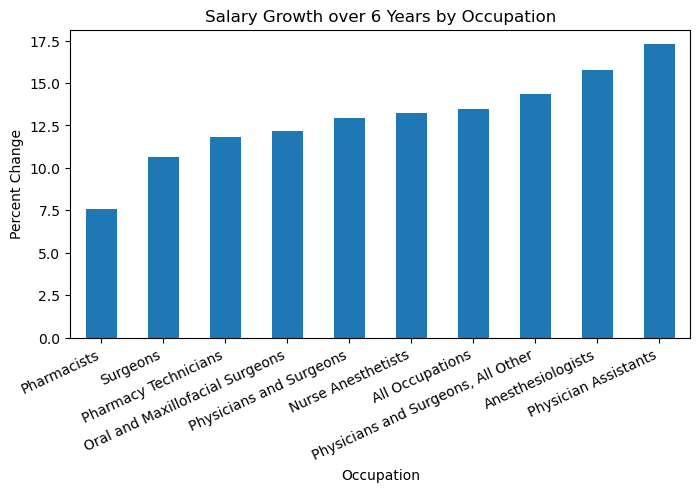

In [31]:
def sub(x):
  return x-100

percChange.apply(sub).sort_values().plot.bar(figsize = (8,4))
plt.title("Salary Growth over 6 Years by Occupation")
plt.xticks(rotation=25, ha="right")
plt.xlabel("Occupation")
plt.ylabel("Percent Change")

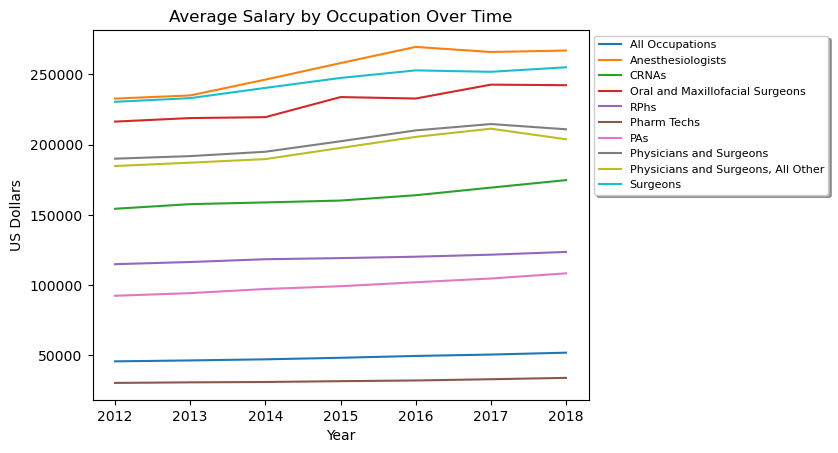

In [17]:
plt.plot(occs, label=["All Occupations","Anesthesiologists","CRNAs","Oral and Maxillofacial Surgeons","RPhs","Pharm Techs","PAs","Physicians and Surgeons","Physicians and Surgeons, All Other","Surgeons"])
plt.title("Average Salary by Occupation Over Time")
plt.xlabel("Year")
plt.ylabel("US Dollars")
plt.legend(fontsize=8,bbox_to_anchor=(1,1),fancybox=True,shadow=True)
plt.show()

<AxesSubplot:title={'center':'Average Salary Across All Occupations Over Time'}, xlabel='YEAR', ylabel='US Dollars'>

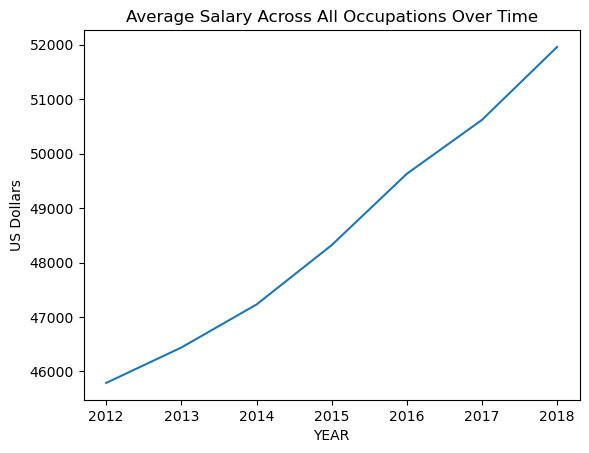

In [18]:
plt.title("Average Salary Across All Occupations Over Time")
plt.xlabel("Year")
plt.ylabel("US Dollars")
occs["All Occupations"].plot()

<AxesSubplot:title={'center':'Average Pharmacist Salary Over Time'}, xlabel='YEAR', ylabel='US Dollars'>

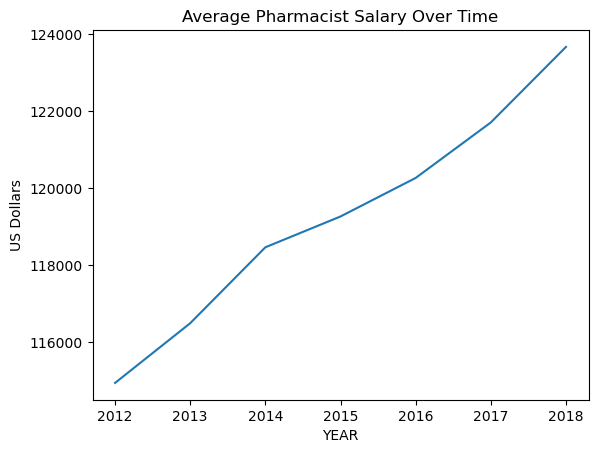

In [19]:
plt.title("Average Pharmacist Salary Over Time")
plt.xlabel("Year")
plt.ylabel("US Dollars")
occs["Pharmacists"].plot()

<AxesSubplot:title={'center':'Average Anesthesiologist Salary Over Time'}, xlabel='YEAR', ylabel='US Dollars'>

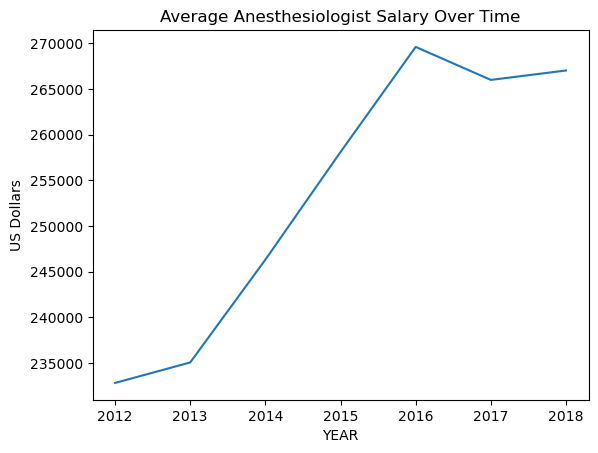

In [20]:
plt.title("Average Anesthesiologist Salary Over Time")
plt.xlabel("Year")
plt.ylabel("US Dollars")
occs["Anesthesiologists"].plot()

<AxesSubplot:title={'center':'Average PA Salary Over Time'}, xlabel='YEAR', ylabel='US Dollars'>

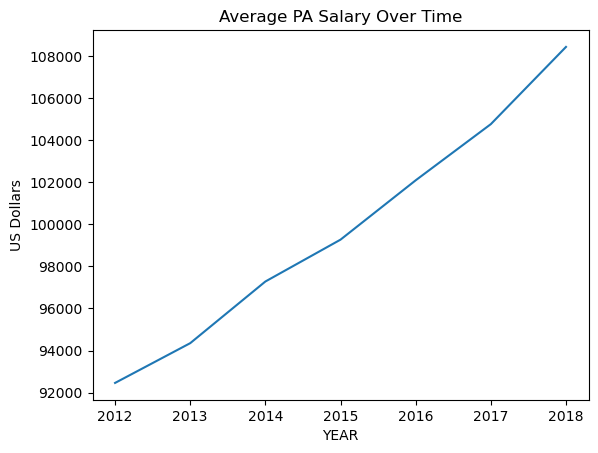

In [21]:
plt.title("Average PA Salary Over Time")
plt.xlabel("Year")
plt.ylabel("US Dollars")
occs["Physician Assistants"].plot()

<AxesSubplot:title={'center':'Average Physician & Surgeon Salary Over Time'}, xlabel='YEAR', ylabel='US Dollars'>

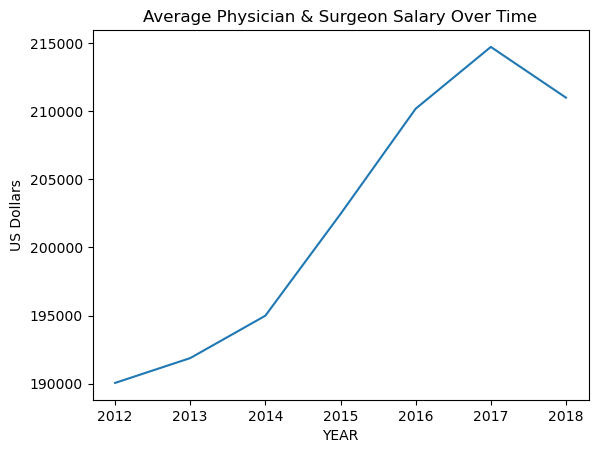

In [22]:
plt.title("Average Physician & Surgeon Salary Over Time")
plt.xlabel("Year")
plt.ylabel("US Dollars")
occs["Physicians and Surgeons"].plot()

<AxesSubplot:title={'center':'Average Pharmacy Technician Salary Over Time'}, xlabel='YEAR', ylabel='US Dollars'>

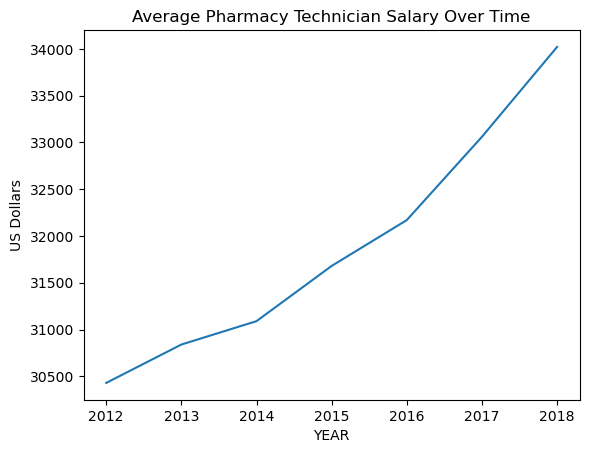

In [23]:
plt.title("Average Pharmacy Technician Salary Over Time")
plt.xlabel("Year")
plt.ylabel("US Dollars")
occs["Pharmacy Technicians"].plot()